In coursera Deep Learning Specialization course# 1, we started our journey of deep learning by building a logistic regression from scratch to classify **cat vs non-cat** images. Gradually, we implemented 2 layer Neural Network and finally, a deep neural network.

In this section, I will try build a multiple linear regression model by feeding in several explanatory variables to predict the outcome of a response variable. The main difference linear regression is that we are predicting 

The **Diabetes dataset** for this project is taken from sklearn library. Using this databset, we will build a Multiple LR model for predicting **quantitative measure of disease progression after one year** from the values of several independent variables. After that, I will also implement 2 layer NNs and finally a deep NNs.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
from lr import linear_regression_model
%matplotlib inline

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.
Data Set Characteristics:

<h4>Number of Instances</h4>
442

<h4>Number of Attributes</h4>
First 10 columns are numeric predictive values

<h4>Target</h4>
Column 11 is a quantitative measure of disease progression one year after baseline

<h4>Attribute Information</h4>
<ol>
    <li> age age in years</li>
    <li> sex</li>
    <li> bmi body mass index</li>
    <li> bp average blood pressure</li>
    <li> s1 tc, T-Cells (a type of white blood cells)</li>
    <li> s2 ldl, low-density lipoproteins</li>
    <li> s3 hdl, high-density lipoproteins</li>
    <li> s4 tch, thyroid stimulating hormone </li>
    <li> s5 ltg, lamotrigine </li>
    <li> s6 glu, blood sugar level</li>
</ol>

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
diab = pd.DataFrame(diabetes['data'])

Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

In [6]:
diab.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
diab.columns = diabetes['feature_names']

In [8]:
diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [9]:
X = diab

In [10]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [11]:
y = diabetes['target']

In [12]:
y.shape

(442,)

In [13]:
#split dataset into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=5)

In [14]:
X_train.shape

X_train = X_train.T

X_train.shape

y_train.shape

y_train = np.array([y_train])

y_train.shape

X_val.shape

X_val = X_val.T

X_val.shape

y_val = np.array([y_val])

y_val.shape

(296, 10)

**Part 1**
Linear Regression Model

epochs 1/2500: 
Training cost14454.981406531637| validation cost7305.790391038242
Training mae152.3142901139509| validation mae93.63078338231244
epochs 2/2500: 
Training cost7025.294116213772| validation cost4645.625096858185
Training mae93.49343542513597| validation mae72.5492952091254
epochs 3/2500: 
Training cost4346.097902042476| validation cost3688.0093067744906
Training mae72.3149299918821| validation mae68.16387500202292
epochs 4/2500: 
Training cost3376.9860102543657| validation cost3341.415136743954
Training mae65.96890947545515| validation mae67.096442814009
epochs 5/2500: 
Training cost3023.489899397085| validation cost3213.6247378354014
Training mae64.00144413350148| validation mae66.82194085935252
epochs 6/2500: 
Training cost2891.6288066833768| validation cost3163.8920578952248
Training mae63.614823986075486| validation mae67.08174868044777
epochs 7/2500: 
Training cost2839.5795798022677| validation cost3141.829321007501
Training mae63.59284961743528| validation mae67.310

epochs 323/2500: 
Training cost1795.2742151821149| validation cost2049.022987698047
Training mae50.60924118091349| validation mae54.71152208868474
epochs 324/2500: 
Training cost1794.0656014684678| validation cost2047.7301320186316
Training mae50.588051423756546| validation mae54.69314946390659
epochs 325/2500: 
Training cost1792.8627137837416| validation cost2046.4432370146383
Training mae50.56691553885278| validation mae54.67481510650738
epochs 326/2500: 
Training cost1791.6655172313433| validation cost2045.162265402564
Training mae50.54583335703588| validation mae54.65663527278068
epochs 327/2500: 
Training cost1790.4739771477173| validation cost2043.887180153613
Training mae50.52480470971037| validation mae54.638863550861196
epochs 328/2500: 
Training cost1789.2880591007472| validation cost2042.6179444919273
Training mae50.50382942884963| validation mae54.621128762858234
epochs 329/2500: 
Training cost1788.1077288881675| validation cost2041.3545218928268
Training mae50.482907346994

Training cost1599.7281634719293| validation cost1834.6650815727673
Training mae46.91713101698394| validation mae51.59030426300354
epochs 595/2500: 
Training cost1599.3059503272116| validation cost1834.1794332306104
Training mae46.909380587763145| validation mae51.58255546127546
epochs 596/2500: 
Training cost1598.8850341721247| validation cost1833.6950979185694
Training mae46.90164440026535| validation mae51.57481542771924
epochs 597/2500: 
Training cost1598.4654089148694| validation cost1833.212069487943
Training mae46.89392241625587| validation mae51.56708414880918
epochs 598/2500: 
Training cost1598.0470685004996| validation cost1832.7303418287902
Training mae46.88621459762243| validation mae51.55936161104995
epochs 599/2500: 
Training cost1597.6300069106753| validation cost1832.249908869664
Training mae46.8785209063747| validation mae51.5516478009765
epochs 600/2500: 
Training cost1597.2142181634206| validation cost1831.7707645773523
Training mae46.870841304643925| validation mae51

epochs 890/2500: 
Training cost1513.5275340494204| validation cost1730.480567790737
Training mae45.208196833896835| validation mae49.86295071622254
epochs 891/2500: 
Training cost1513.3268781271024| validation cost1730.2227163081516
Training mae45.203936059313996| validation mae49.85842932475211
epochs 892/2500: 
Training cost1513.1266448632114| validation cost1729.9653183475516
Training mae45.199681306634076| validation mae49.85391211474868
epochs 893/2500: 
Training cost1512.9268330079706| validation cost1729.70837272235
Training mae45.1954325626366| validation mae49.84939908256852
epochs 894/2500: 
Training cost1512.7274413172024| validation cost1729.4518782513553
Training mae45.19118981413996| validation mae49.84489022456963
epochs 895/2500: 
Training cost1512.5284685522918| validation cost1729.1958337587391
Training mae45.186953048001214| validation mae49.84038553711187
epochs 896/2500: 
Training cost1512.329913480156| validation cost1728.9402380740019
Training mae45.1827222511160

epochs 1124/2500: 
Training cost1475.995903227675| validation cost1680.5131726685956
Training mae44.38579739309266| validation mae48.93529315582688
epochs 1125/2500: 
Training cost1475.8688218941795| validation cost1680.337378526387
Training mae44.38306633244236| validation mae48.93187290179256
epochs 1126/2500: 
Training cost1475.7419737331954| validation cost1680.1618572504105
Training mae44.38033836606165| validation mae48.92845582615083
epochs 1127/2500: 
Training cost1475.6153582279167| validation cost1679.9866083372813
Training mae44.37761348865733| validation mae48.925041925847616
epochs 1128/2500: 
Training cost1475.4889748631458| validation cost1679.8116312850448
Training mae44.37489169494956| validation mae48.921631197831715
epochs 1129/2500: 
Training cost1475.3628231252887| validation cost1679.6369255931722
Training mae44.37217297967197| validation mae48.91822363905476
epochs 1130/2500: 
Training cost1475.2369025023438| validation cost1679.462490762552
Training mae44.369457

Training cost1446.2219825735647| validation cost1637.8054956767683
Training mae43.74537843977565| validation mae48.08098219899947
epochs 1428/2500: 
Training cost1446.147410456752| validation cost1637.6941970504465
Training mae43.743791831299454| validation mae48.078712909993115
epochs 1429/2500: 
Training cost1446.072965148737| validation cost1637.583062974703
Training mae43.74220672478817| validation mae48.0764456624767
epochs 1430/2500: 
Training cost1445.9986464125782| validation cost1637.472093192556
Training mae43.740623118330944| validation mae48.07418045474775
epochs 1431/2500: 
Training cost1445.924454011851| validation cost1637.361287447487
Training mae43.73904101002063| validation mae48.07191728510448
epochs 1432/2500: 
Training cost1445.8503877106473| validation cost1637.2506454834404
Training mae43.73746039795377| validation mae48.06965615184576
epochs 1433/2500: 
Training cost1445.7764472735726| validation cost1637.1401670448217
Training mae43.73588128023058| validation m

epochs 1724/2500: 
Training cost1428.7647723086739| validation cost1611.0005095008019
Training mae43.36420518828476| validation mae47.498468407925664
epochs 1725/2500: 
Training cost1428.7192959254185| validation cost1610.928480480949
Training mae43.363263227946995| validation mae47.49676510755232
epochs 1726/2500: 
Training cost1428.6738937059283| validation cost1610.8565560590143
Training mae43.36232208955667| validation mae47.49506335657294
epochs 1727/2500: 
Training cost1428.6285655199342| validation cost1610.784736078165
Training mae43.36138177216706| validation mae47.49336315361978
epochs 1728/2500: 
Training cost1428.5833112374135| validation cost1610.7130203818158
Training mae43.36044227483311| validation mae47.491664497326006
epochs 1729/2500: 
Training cost1428.5381307285904| validation cost1610.6414088136285
Training mae43.35950359661142| validation mae47.48996738632559
epochs 1730/2500: 
Training cost1428.4930238639358| validation cost1610.5699012175103
Training mae43.3585

epochs 1978/2500: 
Training cost1419.282902753043| validation cost1595.6811959966255
Training mae43.18652060068424| validation mae47.11207529363249
epochs 1979/2500: 
Training cost1419.2526654038768| validation cost1595.631296928732
Training mae43.18594109850135| validation mae47.110724045948196
epochs 1980/2500: 
Training cost1419.2224758369641| validation cost1595.581469541772
Training mae43.18536206596514| validation mae47.10937402966546
epochs 1981/2500: 
Training cost1419.1923339708487| validation cost1595.5317137300078
Training mae43.18478350258289| validation mae47.108025243651156
epochs 1982/2500: 
Training cost1419.1622397242243| validation cost1595.4820293878633
Training mae43.18420540786266| validation mae47.106677686773104
epochs 1983/2500: 
Training cost1419.1321930159304| validation cost1595.432416409922
Training mae43.183627781313305| validation mae47.10533135789999
epochs 1984/2500: 
Training cost1419.102193764954| validation cost1595.3828746909326
Training mae43.183050

epochs 2260/2500: 
Training cost1412.3822108996715| validation cost1584.0970784941417
Training mae43.05104327646973| validation mae46.775857317854836
epochs 2261/2500: 
Training cost1412.3626999076075| validation cost1584.0637424276947
Training mae43.05067153215927| validation mae46.77481177518338
epochs 2262/2500: 
Training cost1412.3432186484692| validation cost1584.0304537918964
Training mae43.050300065870815| validation mae46.773767179828006
epochs 2263/2500: 
Training cost1412.3237670729739| validation cost1583.9972125179045
Training mae43.049928877347156| validation mae46.77272353090201
epochs 2264/2500: 
Training cost1412.304345131926| validation cost1583.9640185369797
Training mae43.049557966331434| validation mae46.77168082751952
epochs 2265/2500: 
Training cost1412.2849527762148| validation cost1583.9308717804868
Training mae43.04918733256713| validation mae46.77063906879542
epochs 2266/2500: 
Training cost1412.2655899568172| validation cost1583.8977721798944
Training mae43.0

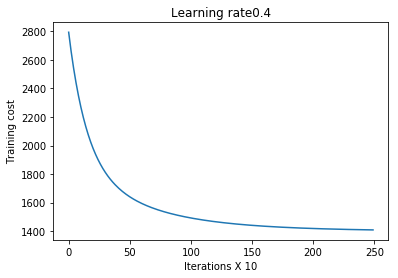

In [29]:
linear_regression_model(X_train, y_train, X_val, y_val, 0.4, 2500)

In the cells above, I build a linear regression model and tested the model by calculating **MEAN ABSOLUTE ERROR (MAE)**. In the cells below, we will run sklearn's linear model to calculate MAE and compare to my model.

In [30]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train.T, y_train.T)
prediction = lr.predict(X_val.T)

In [31]:
prediction.shape

(146, 1)

In [32]:
MAE_val_sklearn = (1/y_val.shape[1])*np.sum(np.abs(prediction-y_val.T))

In [33]:
MAE_val_sklearn

45.36454863073616